In [25]:
#Assignment module 6 Simple linear regression Calories data 

In [3]:
# lets import files Weight and calories 
cal <- read.csv(file.choose())

In [4]:
cal ########################### DATA pre processing #############################################################

Weight.gained..grams.,Calories.Consumed
<int>,<int>
108,1500
200,2300
900,3400
200,2200
300,2500
110,1600
128,1400
62,1900
600,2800


In [5]:
# structure of data frame , it is the data relating to weight and calories 
str(cal) # data type is integer 
attach(cal)
summary(cal)

'data.frame':	14 obs. of  2 variables:
 $ Weight.gained..grams.: int  108 200 900 200 300 110 128 62 600 1100 ...
 $ Calories.Consumed    : int  1500 2300 3400 2200 2500 1600 1400 1900 2800 3900 ...


 Weight.gained..grams. Calories.Consumed
 Min.   :  62.0        Min.   :1400     
 1st Qu.: 114.5        1st Qu.:1728     
 Median : 200.0        Median :2250     
 Mean   : 357.7        Mean   :2341     
 3rd Qu.: 537.5        3rd Qu.:2775     
 Max.   :1100.0        Max.   :3900     

In [6]:
colnames(cal) # Viewing and checking column names 

[1] "Weight.gained..grams." "Calories.Consumed"

In [7]:
# Rename column where names is "Sepal.Length"
names(cal)[names(cal) == 'Weight.gained..grams.'] <- "Weight" # renaming column name for convinience
names(cal)[names(cal) == 'Calories.Consumed'] <- "Calories"
cal
attach(cal) # afte changing attaching value

Weight,Calories
<int>,<int>
108,1500
200,2300
900,3400
200,2200
300,2500
110,1600
128,1400
62,1900
600,2800


In [8]:
Weight # fine its working 
Calories # fine its working 

[1]  108  200  900  200  300  110  128   62  600 1100  100  150  350  700

[1] 1500 2300 3400 2200 2500 1600 1400 1900 2800 3900 1670 1900 2700 3000

[1] 1.116977

[1] 0.5825597

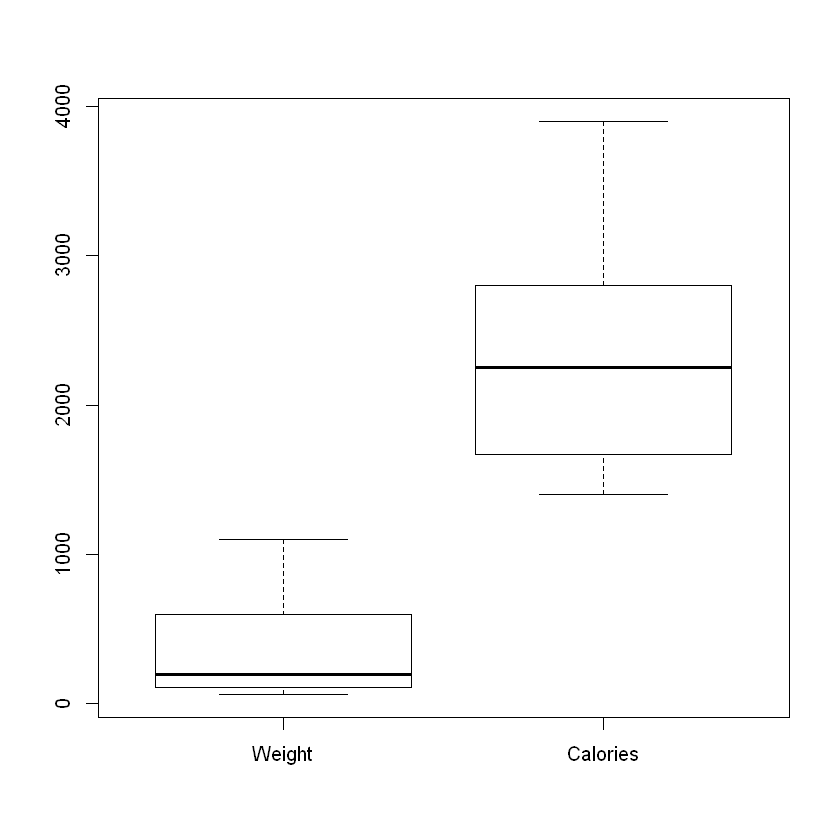

In [9]:
# priliminary investigation for outliers 
boxplot(cal)
# as there is no outliers we can see 
library(moments) # both aer positive skewness 
skewness(Weight)
skewness(Calories)

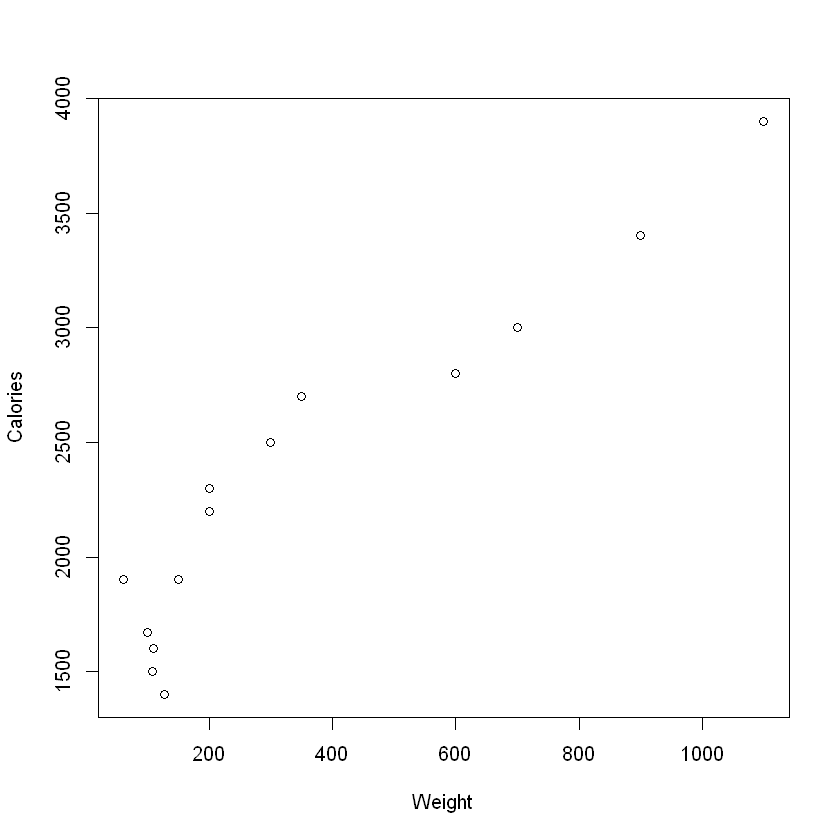

In [10]:
plot(Weight,Calories)

################################(Basics-Statistics & Visualizations EDA)###############################################

In [11]:
# Pre porcessing data checking for NA values 
dim(cal)
str(cal)  # data frame 
sum(is.na(cal)==T) # as there is no NA value if 0 there is no na value exist

mean(Weight) # checking if perfectly mean is coming or not 
mean(Calories) # mean is proof there is no NA value


[1] 14  2

'data.frame':	14 obs. of  2 variables:
 $ Weight  : int  108 200 900 200 300 110 128 62 600 1100 ...
 $ Calories: int  1500 2300 3400 2200 2500 1600 1400 1900 2800 3900 ...


[1] 0

[1] 357.7143

[1] 2340.714

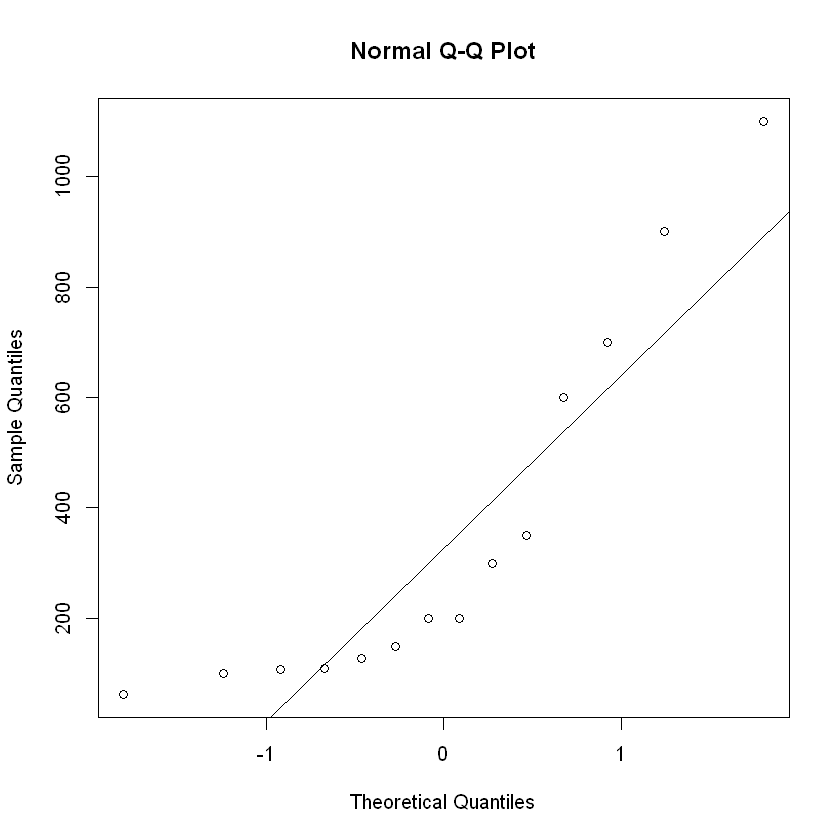

[1] 0.946991

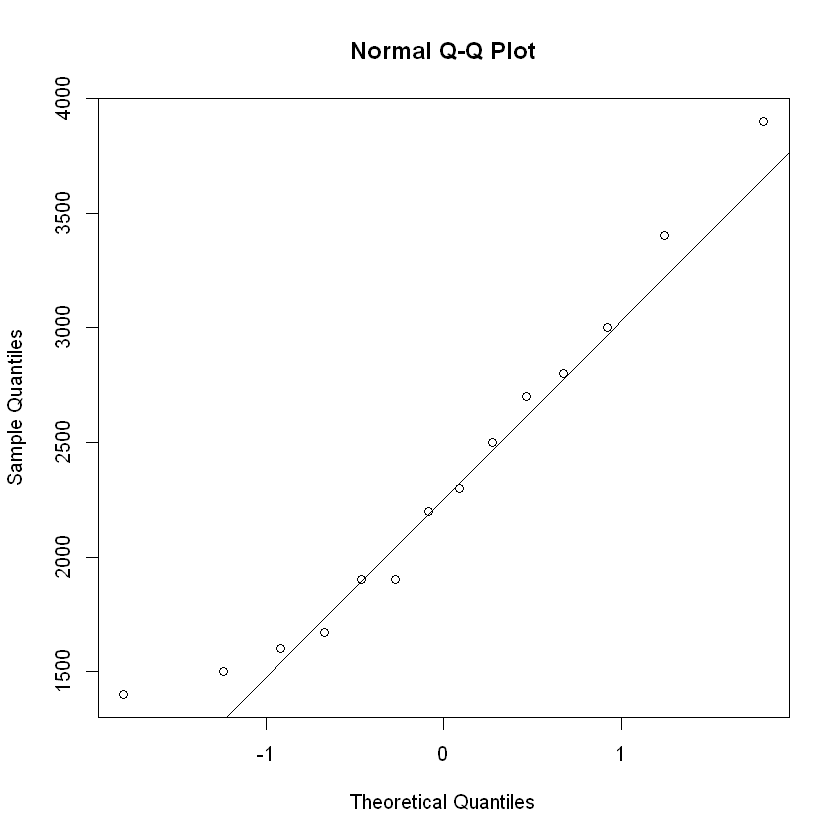

In [12]:
# Just checking how normally data is distributed
qqnorm(Weight)
qqline(Weight)
qqnorm(Calories)
qqline(Calories)
cor(Weight,Calories) # correlation is 0.946991008855446

In [13]:
#sample split data into train test 50:50 ratio as dat ais less
library(ISLR)
attach(cal)
smp_siz = floor(0.50*nrow(cal))  # creates a value for dividing the data into train and test. In this case the value is defined as 75% of the number of rows in the dataset
smp_siz  # shows the value of the sample size

The following objects are masked from cal (pos = 5):

    Calories, Weight




[1] 7

In [14]:
set.seed(123)   # set seed to ensure you always have same random numbers generated
train_ind = sample(seq_len(nrow(cal)),size = smp_siz)  # Randomly identifies therows equal to sample size ( defined in previous instruction) from  all the rows of Smarket dataset and stores the row number in train_ind
train =cal[train_ind,] #creates the training dataset with row numbers stored in train_ind
test=cal[-train_ind,]  # creates the test dataset excluding the row numbers mentioned in train_ind

In [15]:
test

,Weight,Calories
,<int>,<int>
1,108,1500
7,128,1400
8,62,1900
9,600,2800
11,100,1670
12,150,1900
13,350,2700


In [16]:
train

,Weight,Calories
,<int>,<int>
3,900,3400
14,700,3000
10,1100,3900
2,200,2300
6,110,1600
5,300,2500
4,200,2200


[1] 103.3025

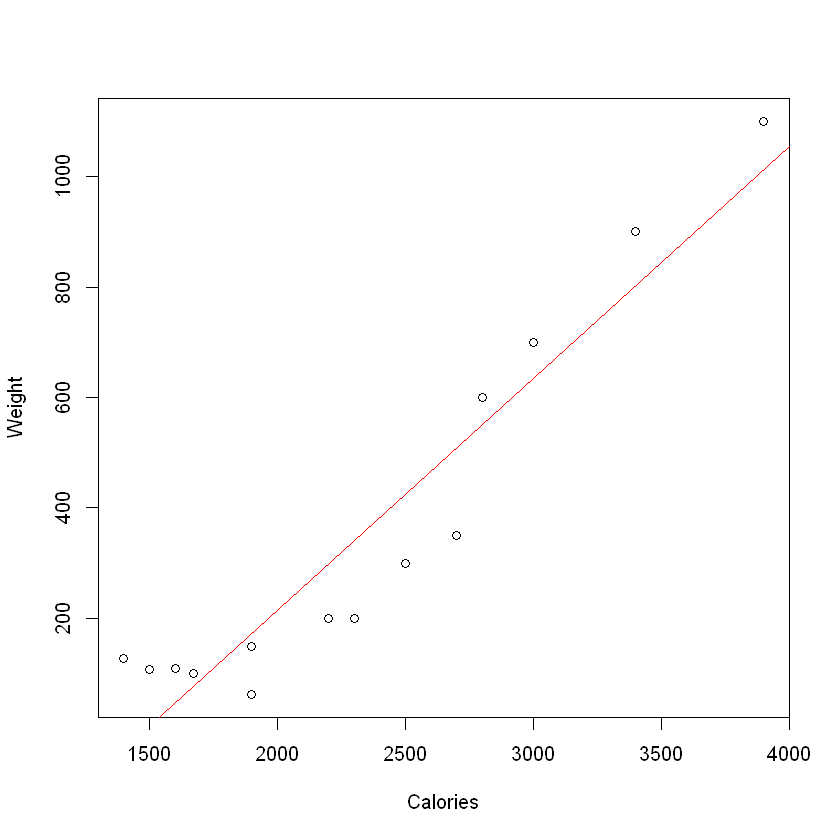

In [64]:
# we trying to fit a linear regression line  by plotting linear model 
lm <- lm(Weight~Calories,data=cal) # linear model
rmse <- sqrt(mean(lm$residuals^2))
rmse # rmse is too high value 
plot( Calories,Weight) # scatter plot X is Waist and y is AT
abline(lm(Weight~Calories,data = cal),col = 'red') # made a regression line 

In [69]:
summary(lm)


Call:
lm(formula = Weight ~ Calories, data = cal)

Residuals:
    Min      1Q  Median      3Q     Max 
-158.67 -107.56   36.70   81.68  165.53 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -625.75236  100.82293  -6.206 4.54e-05 ***
Calories       0.42016    0.04115  10.211 2.86e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 111.6 on 12 degrees of freedom
Multiple R-squared:  0.8968,	Adjusted R-squared:  0.8882 
F-statistic: 104.3 on 1 and 12 DF,  p-value: 2.856e-07


In [82]:
# lets predict  Coff is  intercept-625.75236 b =   0.42016 x is  108
y =  -625.75236 + 0.42016*5000
y

[1] 1475.048

In [67]:
predi  <- predict(lm,data= cal.Weight[1:10,])
predi

1           2           3           4           5           6 
   4.482599  340.607908  802.780209  298.592245  424.639236   46.498263 
          7           8           9          10          11          12 
 -37.533065  172.545254  550.686227 1012.858527   75.909227  172.545254 
         13          14 
 508.670563  634.717554

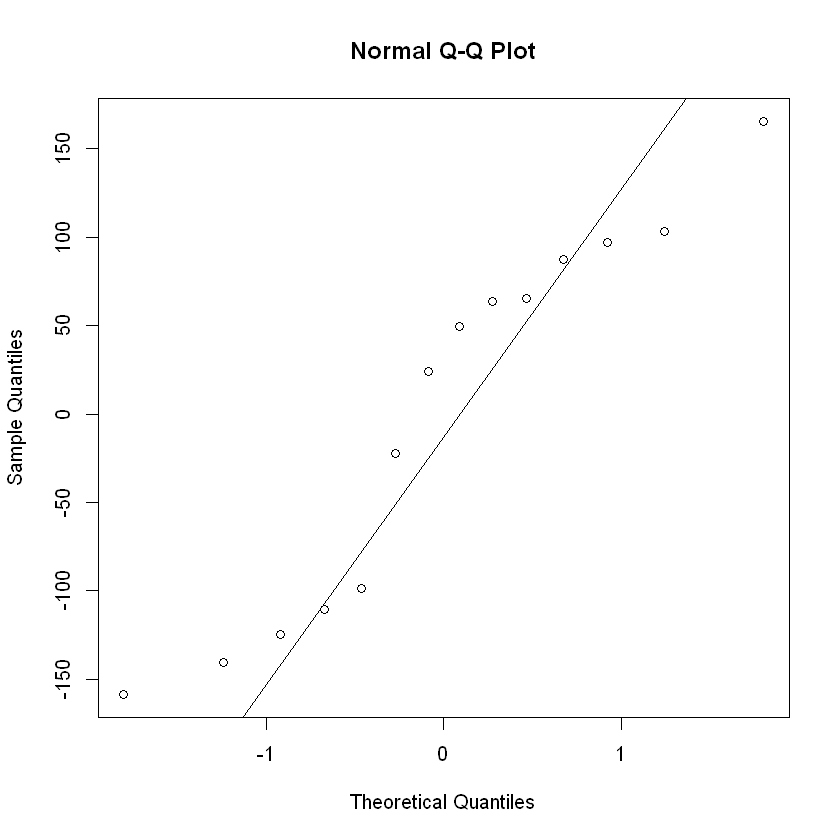

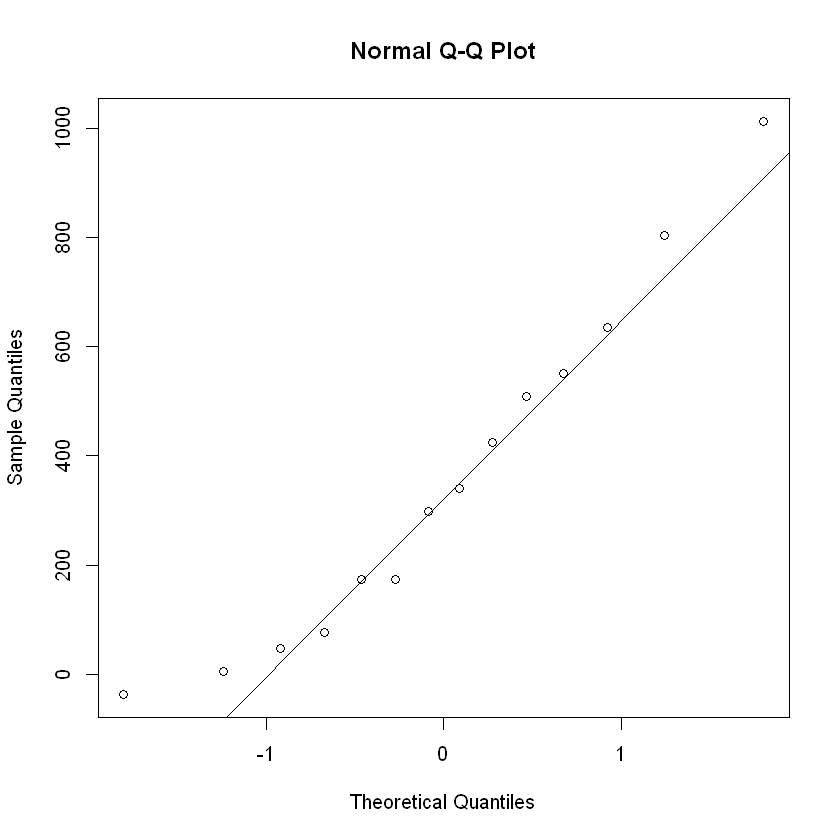

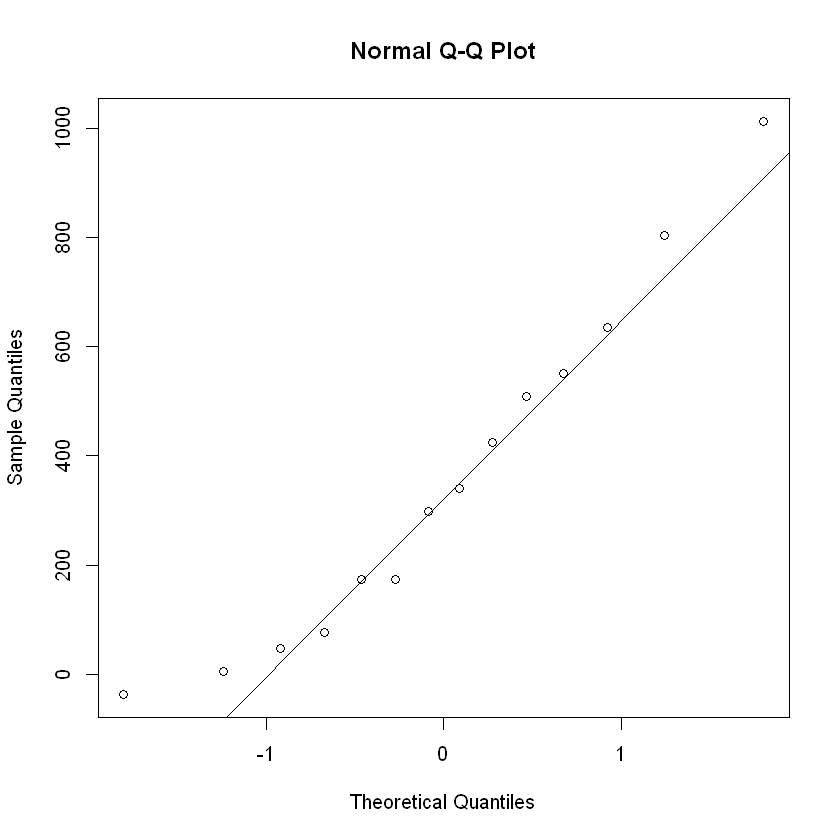

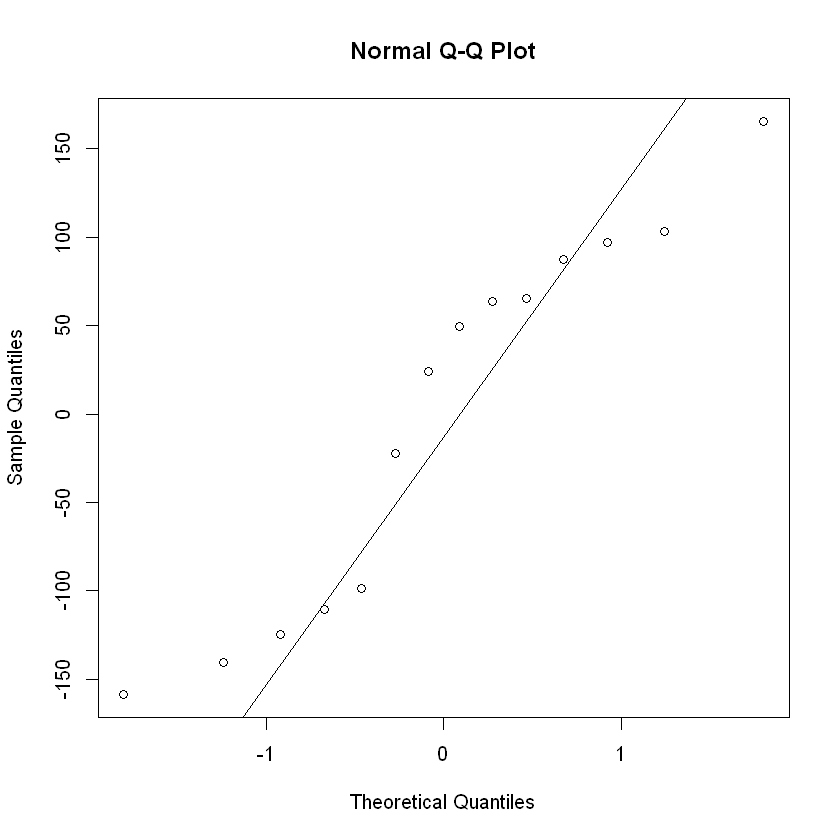

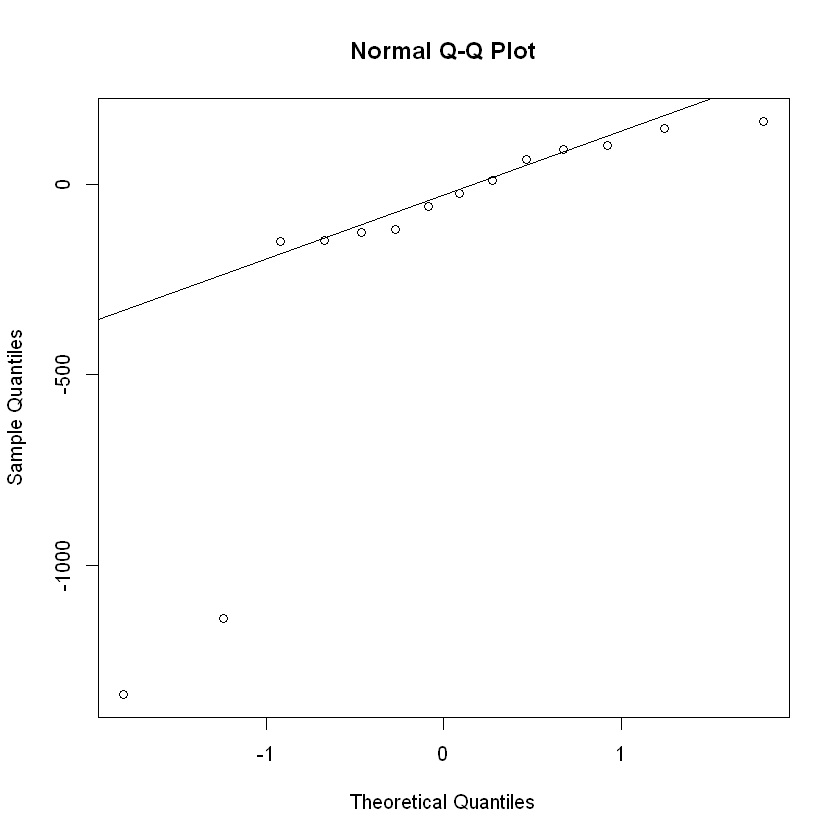

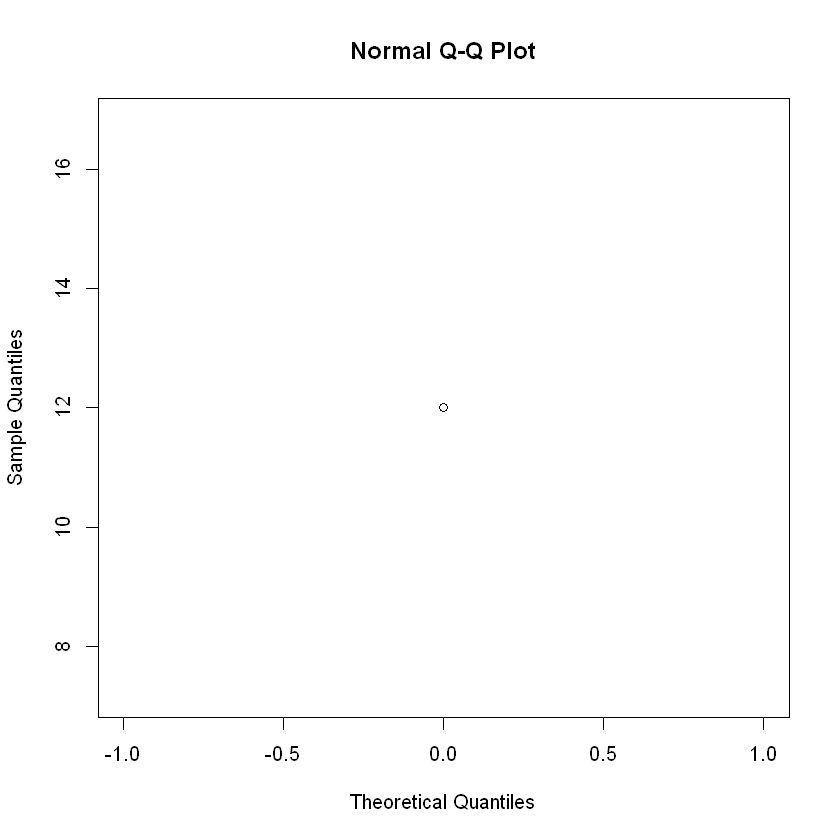

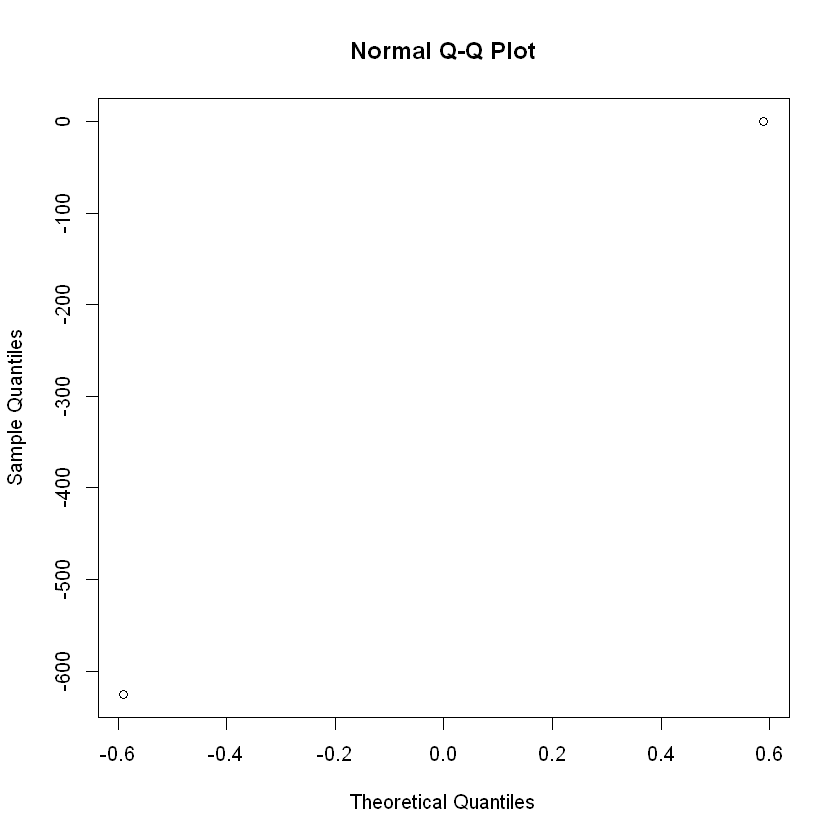

In [68]:
# Dignosis of model in qqnorm mothod

qqnorm(resid(lm))# checking linearity residuals of linear model
qqline(resid(lm)) # trying to fitting a line on the model made
qqnorm(fitted(lm)) # checking fittled 
qqline(fitted(lm)) # linear model fitting line
qqnorm(fitted.values(lm))# checking fitted values
qqline(fitted.values(lm))# checking fitted values
qqnorm(residuals(lm))# checking residials 
qqline(residuals(lm))# fitting line on residuals
qqnorm(effects(lm)) # effects of lm in quantiles
qqline(effects(lm)) # fitting line on effects
qqnorm(df.residual(lm)) # checking digree of freedom
qqnorm(coefficients(lm))# checking cofficnent point on lm. 


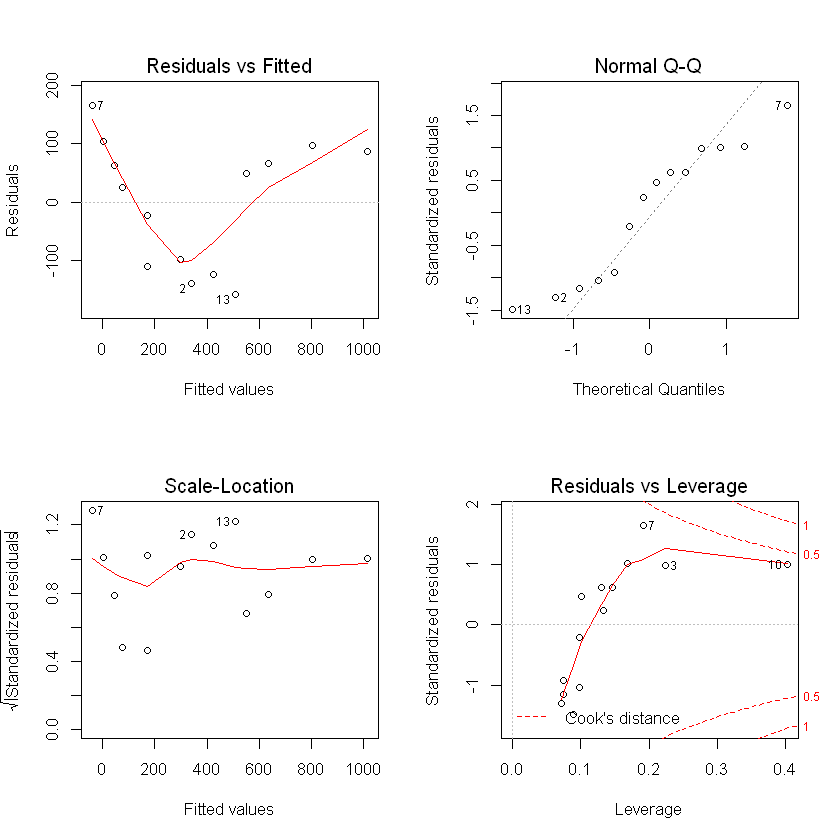

In [20]:
# dignostic plot togeather all need to increase size 
par(mfrow = c(2, 2))
plot(lm)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.3
v tibble  3.0.1     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'broom'


The following object is masked from 'package:modelr':

    bootstrap




Potentially influential observations of
	 lm(formula = Weight ~ Calories, data = cal) :

   dfb.1_ dfb.Clrs dffit cov.r   cook.d hat  
10 -0.61   0.75     0.83  1.67_*  0.34   0.40


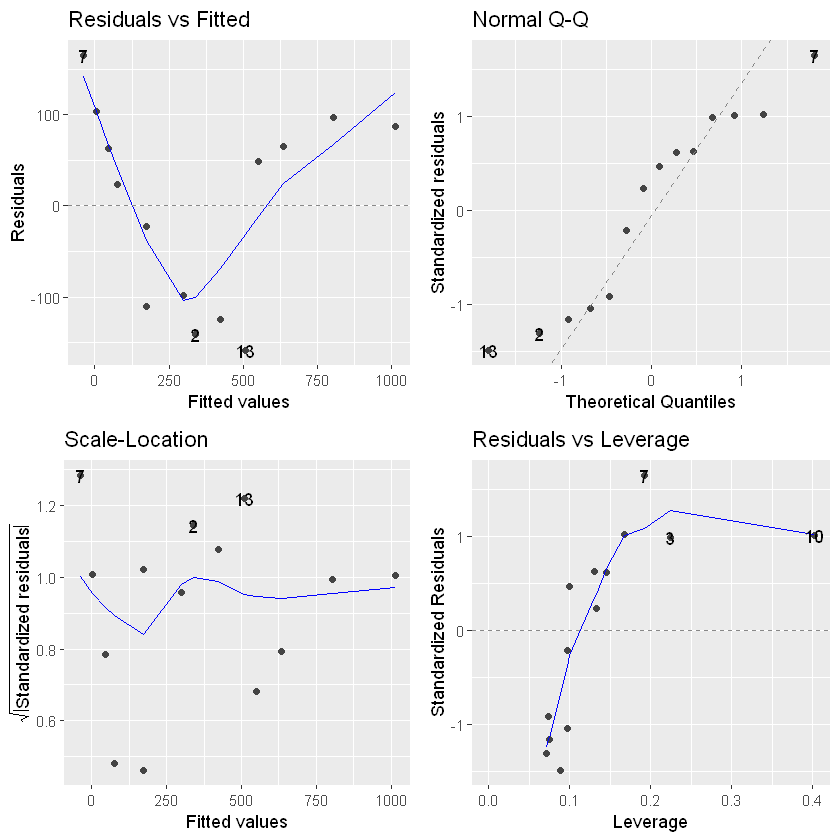

In [21]:
#dignostic plot togeather with outliers with autopilot
#install.packages("ggfortify")
# second method of dignostic plot ggplot 2 
library("tidyverse")
library("modelr")
library("broom")
library("ggfortify")
autoplot(lm)
summary(influence.measures(lm)) # we can have influence measure of cookr and hat value


Call:
lm(formula = Weight ~ Calories, data = cal)

Residuals:
    Min      1Q  Median      3Q     Max 
-158.67 -107.56   36.70   81.68  165.53 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -625.75236  100.82293  -6.206 4.54e-05 ***
Calories       0.42016    0.04115  10.211 2.86e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 111.6 on 12 degrees of freedom
Multiple R-squared:  0.8968,	Adjusted R-squared:  0.8882 
F-statistic: 104.3 on 1 and 12 DF,  p-value: 2.856e-07


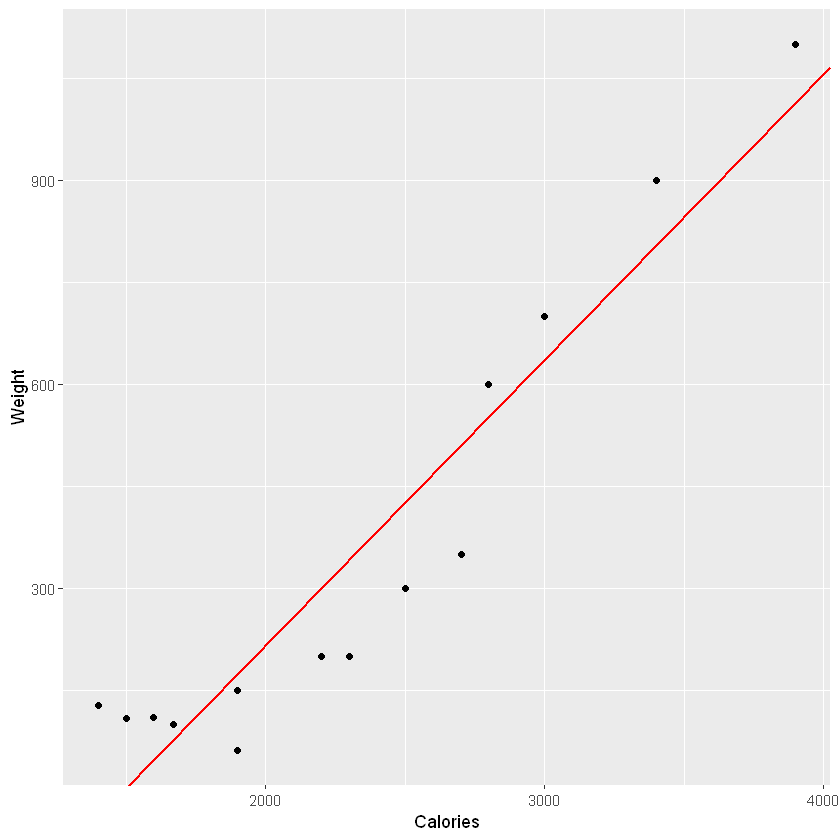

In [22]:

# adding regression line with ggplot2 A scattar plot 
ggplot(cal,aes(x=Calories,y=Weight)) +geom_point()+geom_abline(intercept = -625.75236  ,slope =  0.42016 ,color ='red',size =.65 )# visualizsing geoom point 

summary(lm)

####################################### Checking normality of Data for further annalysis######################################

In [23]:
shapiro.test(Weight) # weight is not normal 
shapiro.test(Calories) # calories follows normal pattern


	Shapiro-Wilk normality test

data:  Weight
W = 0.80997, p-value = 0.006646



	Shapiro-Wilk normality test

data:  Calories
W = 0.94518, p-value = 0.4887


########################################## Model building #####################################################################

[1] 103.3025


Call:
lm(formula = Weight ~ Calories, data = train)

Residuals:
      3      14      10       2       6       5       4 
  56.37   51.91   11.94 -105.89  146.32 -103.66  -57.00 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -818.48991  149.51600  -5.474 0.002772 ** 
Calories       0.48886    0.05348   9.141 0.000263 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 102.6 on 5 degrees of freedom
Multiple R-squared:  0.9435,	Adjusted R-squared:  0.9322 
F-statistic: 83.55 on 1 and 5 DF,  p-value: 0.0002626


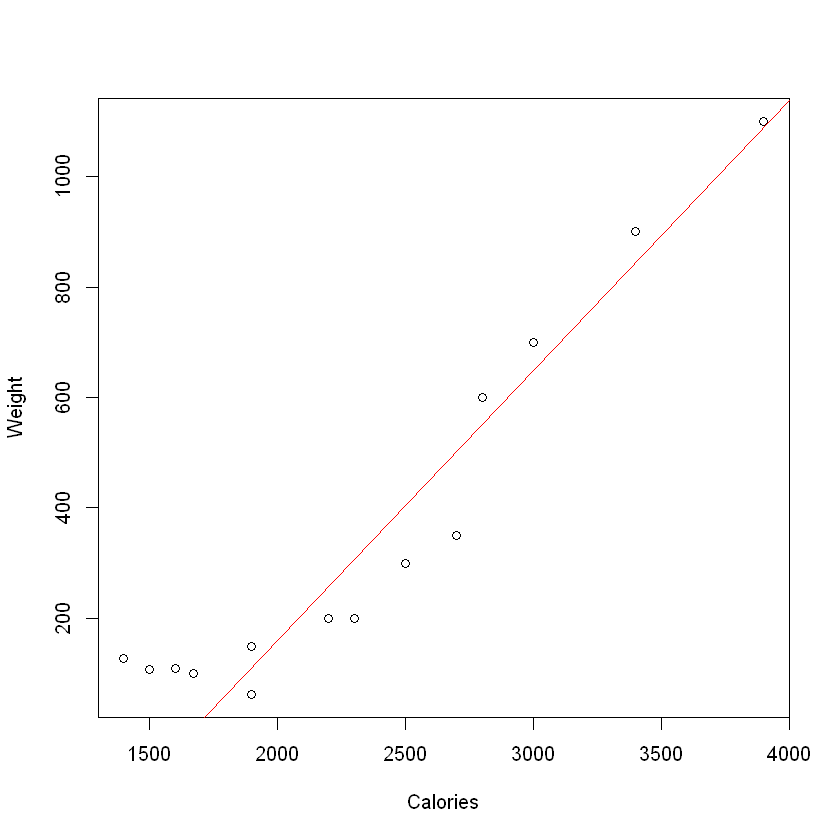

In [24]:
# lets make a linear model With training data set and test it 
# we trying to fit a linear regression line  by plotting linear model 
lm_train <- lm(Weight~Calories,data=train) # linear model
rmse_train <- sqrt(mean(lm$residuals^2))
rmse_train # priliminary model gives rmse 32 which is error is higher 
plot(Calories, Weight) # scatter plot X is Waist and y is AT
abline(lm(Weight~Calories,data = train),col = 'red') # made a regression line 
summary(lm_train)


In [66]:
confint(lm_train,level=0.95)
lm_res  <-  predict(lm_train, interval = "confidence")
lm_res
lm_ex_ploy  <- exp(lm_res)
lm_ex_ploy
err_ploy  <- lm_ex_ploy-Weight
err_ploy
rmse  <- sqrt(mean(err_ploy^2))
rmse
residual  <-  lm_train$residuals
residual

,2.5 %,97.5 %
(Intercept),-1202.8330102,-434.1468034
Calories,0.3513802,0.6263372


,fit,lwr,upr
3,843.62966,705.0752,982.1841
14,648.08618,540.2103,755.9621
10,1088.05901,895.3088,1280.8093
2,305.88509,192.0421,419.7281
6,-36.31599,-217.4391,144.8071
5,403.65683,300.2538,507.0599
4,256.99922,135.9155,378.0829


,fit,lwr,upr
3,Inf,1.622798e+306,Inf
14,2.885704e+281,4.077091e+234,Inf
10,Inf,Inf,Inf
2,6.985670e+132,2.528243e+83,1.930178e+182
6,1.691081e-16,3.693140e-95,7.743421e+62
5,2.022716e+175,2.503589e+130,1.634206e+220
4,4.105298e+111,1.065040e+59,1.582426e+164


Warning message in lm_ex_ploy - Weight:
"longer object length is not a multiple of shorter object length"


,fit,lwr,upr
3,Inf,1.622798e+306,Inf
14,2.885704e+281,4.077091e+234,Inf
10,Inf,Inf,Inf
2,6.985670e+132,2.528243e+83,1.930178e+182
6,-3.000000e+02,-1.500000e+02,7.743421e+62
5,2.022716e+175,2.503589e+130,1.634206e+220
4,4.105298e+111,1.065040e+59,1.582426e+164


[1] Inf

3         14         10          2          6          5          4 
  56.37034   51.91382   11.94099 -105.88509  146.31599 -103.65683  -56.99922

In [67]:
pred1  <- predict(lm_train,test) # prediction points and visualizaton below
pred1

1           7           8           9          11          12 
 -85.201863 -134.087733  110.341615  550.314441   -2.095885  110.341615 
         13 
 501.428571

1           7           8           9          11          12 
 -85.201863 -134.087733  110.341615  550.314441   -2.095885  110.341615 
         13 
 501.428571

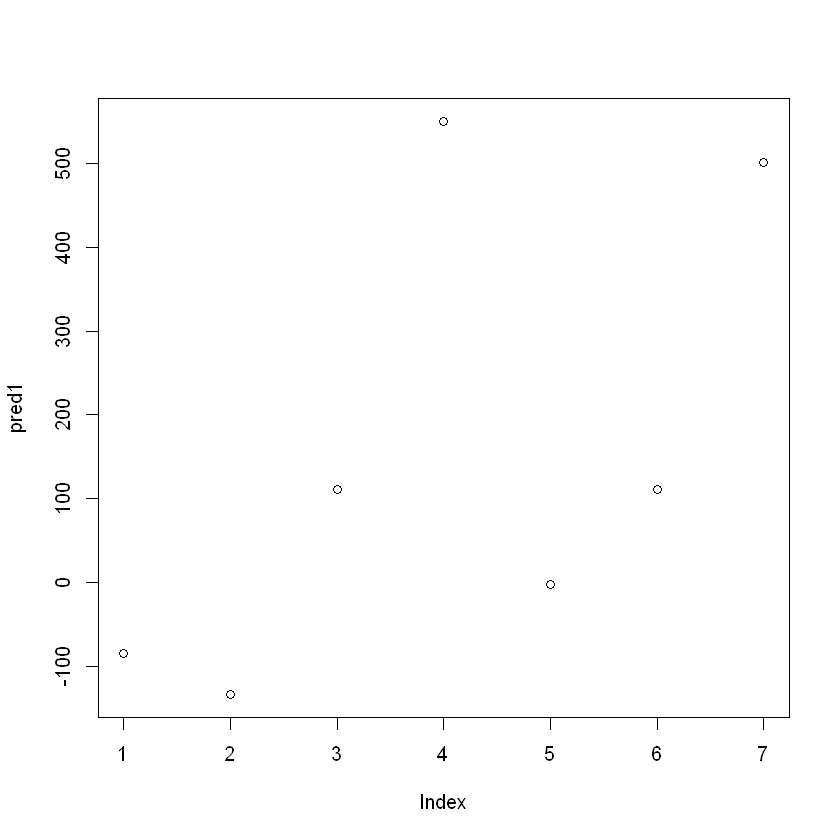

In [68]:
plot(pred1) # our prediction is working lets validate it 
# lets check 10 value of pred
pred  <- predict(lm_train,test) # predicting 10 values 
pred # after prediction we are checking 10 values 

############################################ Cross Validation ############################################################

In [69]:
# K-10 Fold valdation model is ready
library(lattice)
library(caret) 

# Fit linear regression model
Kfoldmodel <- train(Weight ~ Calories, cal,
                    method = "lm",
                    trControl = trainControl(
                      method = "cv", number = 10,
                      verboseIter = TRUE
                    )
) 

predicted <- predict(Kfoldmodel,cal[0:10,]) 
predicted
cal[0:10,]#he row predicted it worked AT is predicted 
#Evaluate error
actual <- cal[0:10, "Weight"]
err <-  sqrt(mean((predicted - actual)^2)) 
err

 #print the model
Kfoldmodel

summary(Kfoldmodel) # p value is too low so we rejecting this model


+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


Aggregating results
Fitting final model on full training set


1           2           3           4           5           6 
   4.482599  340.607908  802.780209  298.592245  424.639236   46.498263 
          7           8           9          10 
 -37.533065  172.545254  550.686227 1012.858527

,Weight,Calories
,<int>,<int>
1,108,1500
2,200,2300
3,900,3400
4,200,2200
5,300,2500
6,110,1600
7,128,1400
8,62,1900
9,600,2800


[1] 109.0288

Linear Regression 

14 samples
 1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 13, 13, 13, 13, 12, 12, ... 
Resampling results:

  RMSE      Rsquared  MAE     
  112.2879  1         108.4789

Tuning parameter 'intercept' was held constant at a value of TRUE


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-158.67 -107.56   36.70   81.68  165.53 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -625.75236  100.82293  -6.206 4.54e-05 ***
Calories       0.42016    0.04115  10.211 2.86e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 111.6 on 12 degrees of freedom
Multiple R-squared:  0.8968,	Adjusted R-squared:  0.8882 
F-statistic: 104.3 on 1 and 12 DF,  p-value: 2.856e-07


In [70]:
pred_train  <- predict(Kfoldmodel,train)
pred_train # the predicted values of train data 

pred_test  <- predict(Kfoldmodel,test)
pred_test # the predicted values of test data 



3         14         10          2          6          5          4 
 802.78021  634.71755 1012.85853  340.60791   46.49826  424.63924  298.59224

1          7          8          9         11         12         13 
  4.482599 -37.533065 172.545254 550.686227  75.909227 172.545254 508.670563

[1] 0.946991


Call:
lm(formula = Weight ~ Calories)

Residuals:
    Min      1Q  Median      3Q     Max 
-158.67 -107.56   36.70   81.68  165.53 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -625.75236  100.82293  -6.206 4.54e-05 ***
Calories       0.42016    0.04115  10.211 2.86e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 111.6 on 12 degrees of freedom
Multiple R-squared:  0.8968,	Adjusted R-squared:  0.8882 
F-statistic: 104.3 on 1 and 12 DF,  p-value: 2.856e-07


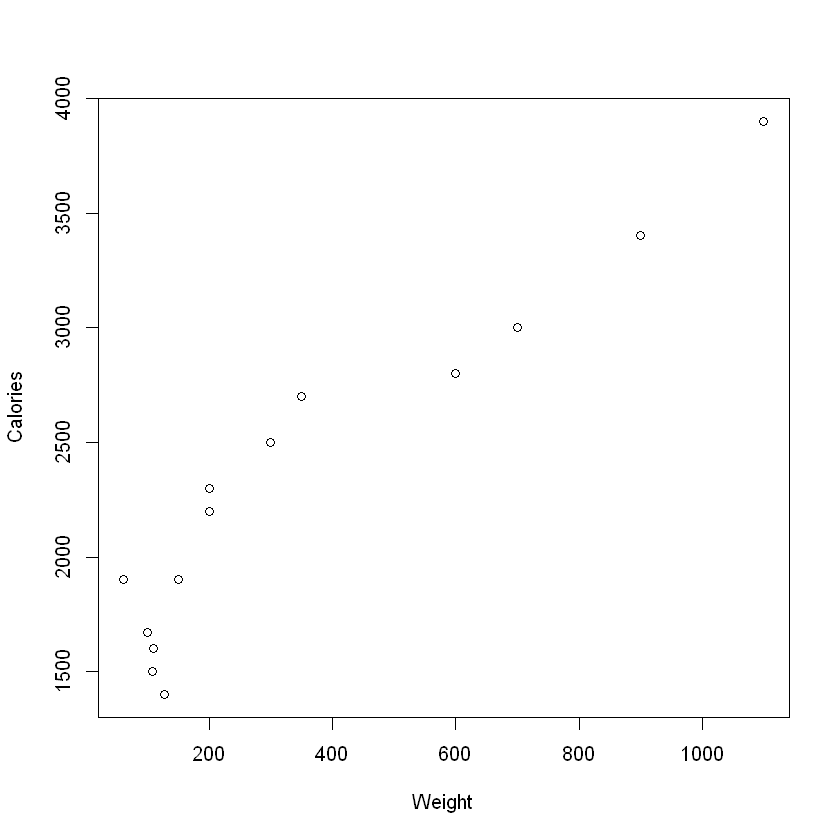

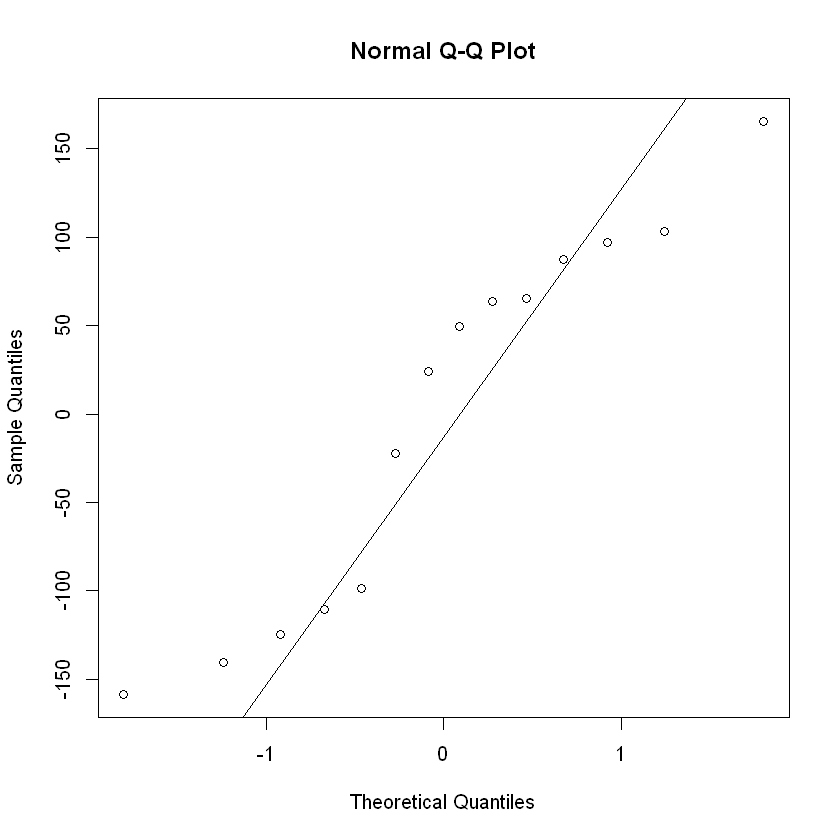

[1] 103.3025

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  103.3   103.3   103.3   103.3   103.3   103.3 

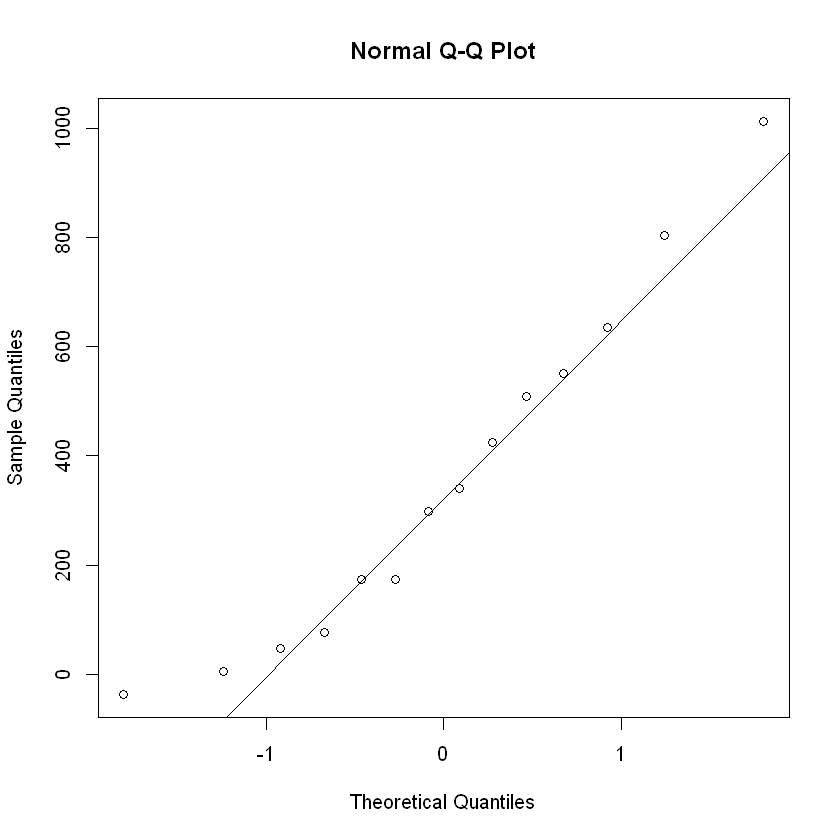

In [71]:
# Log model-1 # exponentioal model
plot( Weight,Calories) 
cor(Weight,Calories)# cor relation little bit improved 
lm_Calories <- lm(Weight ~ Calories) # log transformation
summary(lm_Calories) # after transformatin r square improved but not significant

qqnorm(resid(lm_Calories)) # checking residual value its not a linear
qqline(resid(lm_Calories)) # checking residual value its not a linear
qqnorm(fitted.values(lm_Calories)) # still it is not fitted values
qqline(fitted.values(lm_Calories)) # still it is not fitted values

rmse_Calories <- sqrt(mean(lm_Calories$residuals^2))
rmse_Calories # rmse not imporved , residual errors is large
summary(rmse_Calories) # rmse need to imporved 

[1] 0.9368037


Call:
lm(formula = log(Weight) ~ Calories)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86537 -0.10532  0.02462  0.13467  0.42632 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.8386724  0.2994581   9.479 6.36e-07 ***
Calories    0.0011336  0.0001222   9.276 8.02e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3314 on 12 degrees of freedom
Multiple R-squared:  0.8776,	Adjusted R-squared:  0.8674 
F-statistic: 86.04 on 1 and 12 DF,  p-value: 8.018e-07


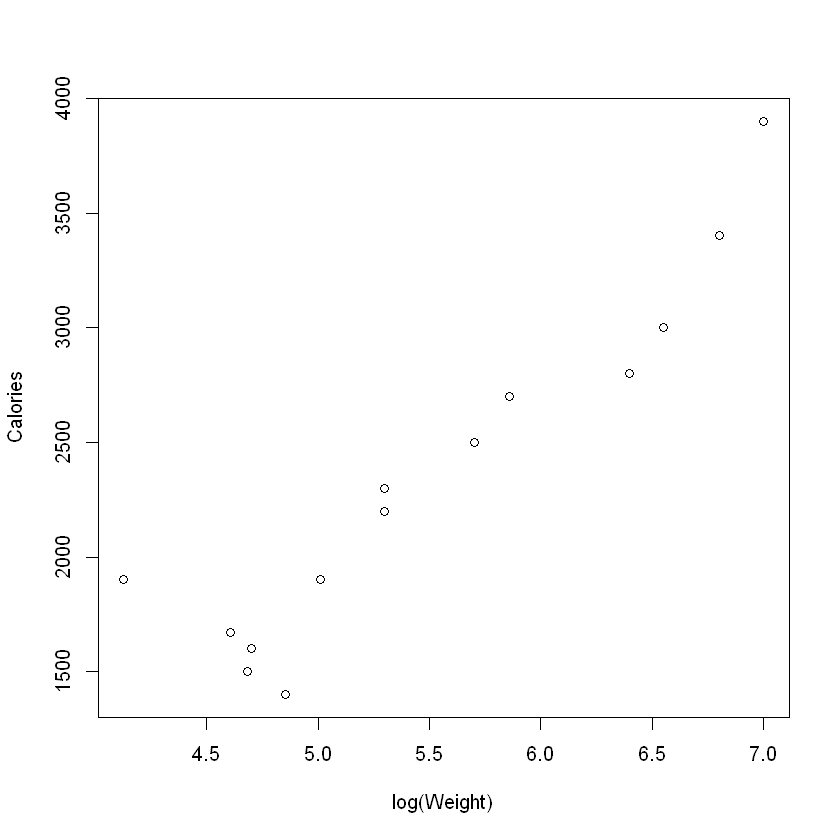

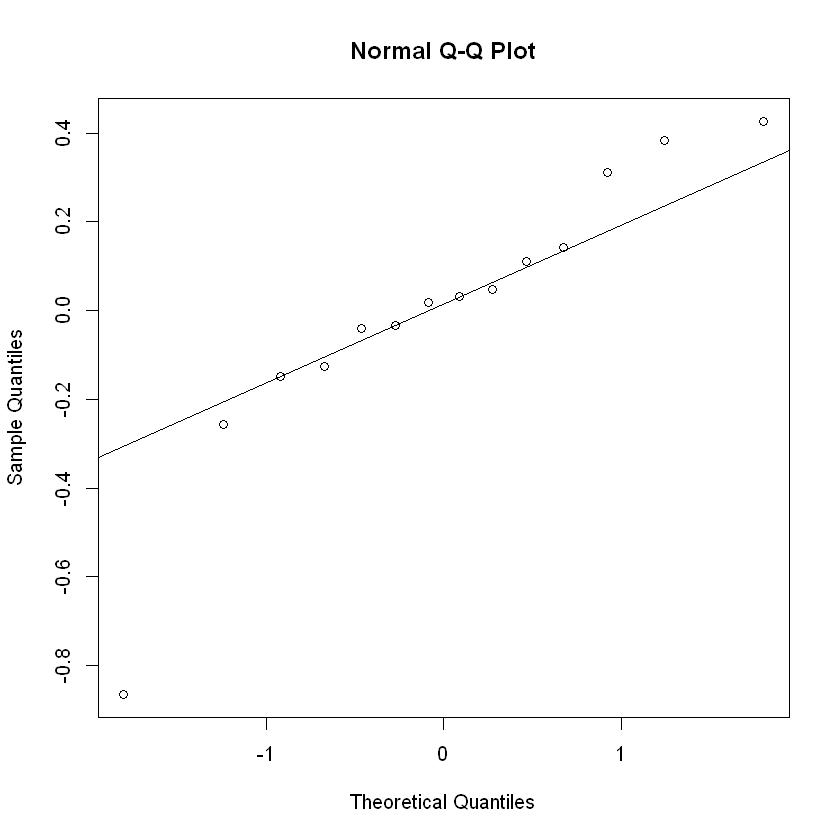

[1] 0.3068228

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3068  0.3068  0.3068  0.3068  0.3068  0.3068 

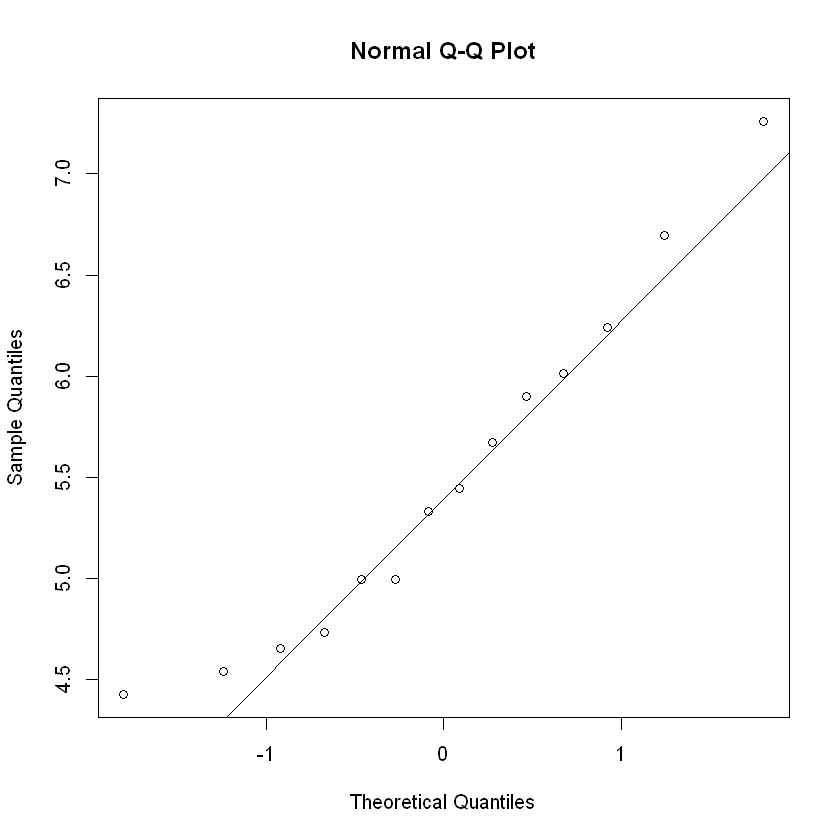

In [50]:
# log transformation  Exponential model 2 
# Log model-2 
plot(log(Weight), Calories) 
cor(log(Weight), Calories)
lm_Log_Weight <-lm(log(Weight) ~ Calories) # log transformation

summary(lm_Log_Weight) # after transformatin r square little bit improved but not find model

qqnorm(resid(lm_Log_Weight)) # checking residual value its not a linear
qqline(resid(lm_Log_Weight)) # checking residual value its not a linear
qqnorm(fitted.values(lm_Log_Weight)) # still it is not fitted values
qqline(fitted.values(lm_Log_Weight)) # still it is not fitted values

rmse_Weight <- sqrt(mean(lm_Log_Weight$residuals^2))
rmse_Weight # rmse  imporved 
summary(rmse_Weight)

[1] 0.8987253


Call:
lm(formula = Weight ~ log(Calories))

Residuals:
    Min      1Q  Median      3Q     Max 
-187.44 -142.96   23.13  113.20  213.82 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -6955.7     1030.9  -6.747 2.05e-05 ***
log(Calories)    948.4      133.6   7.100 1.25e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 152.3 on 12 degrees of freedom
Multiple R-squared:  0.8077,	Adjusted R-squared:  0.7917 
F-statistic:  50.4 on 1 and 12 DF,  p-value: 1.248e-05


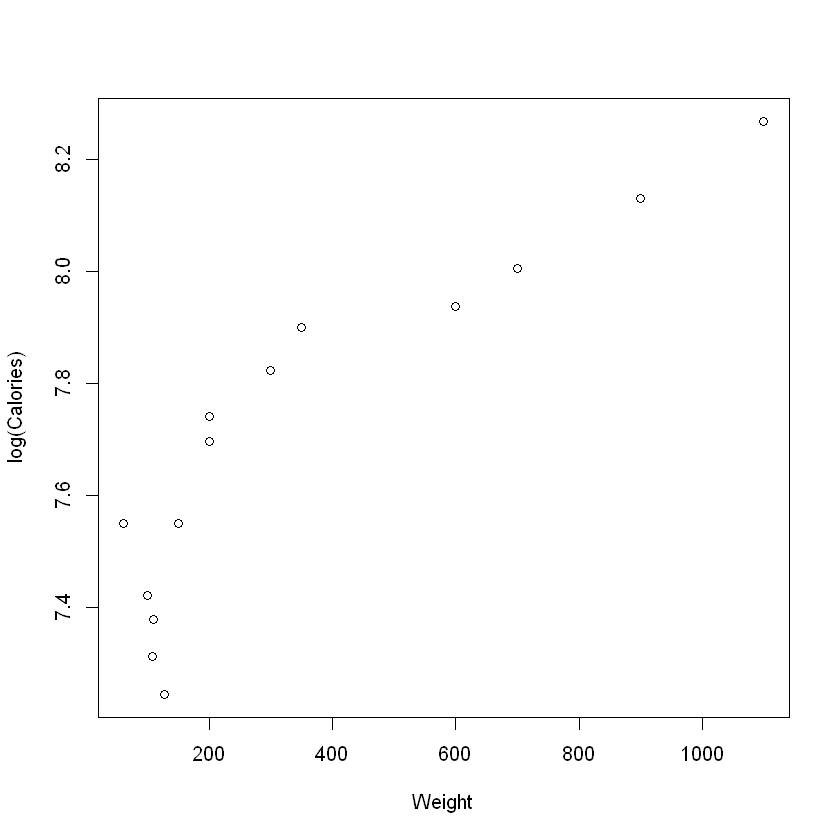

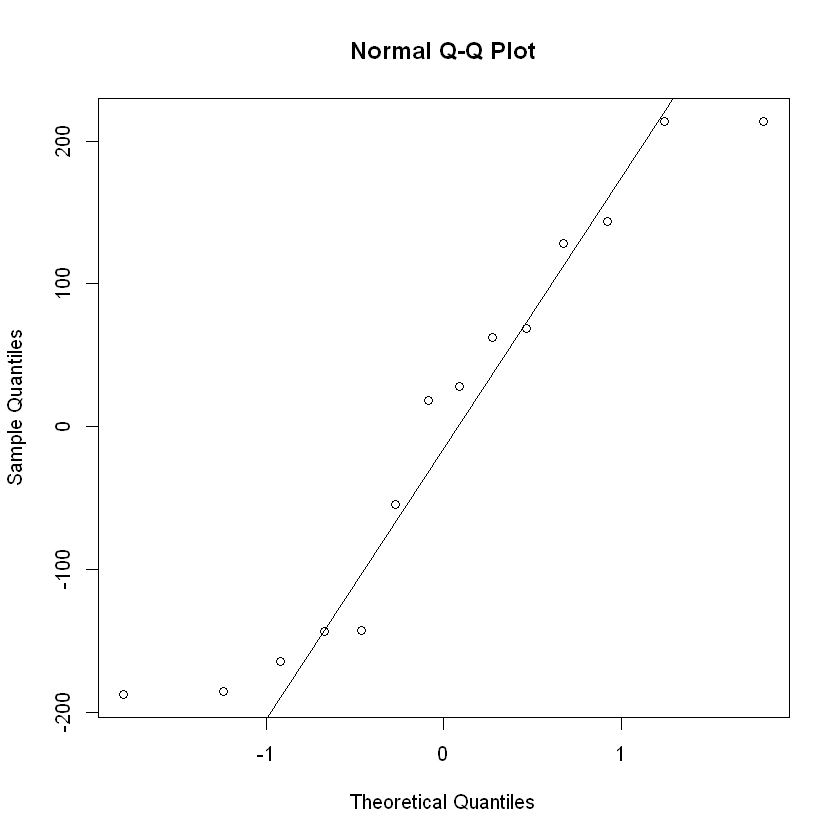

[1] 141.0054

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    141     141     141     141     141     141 

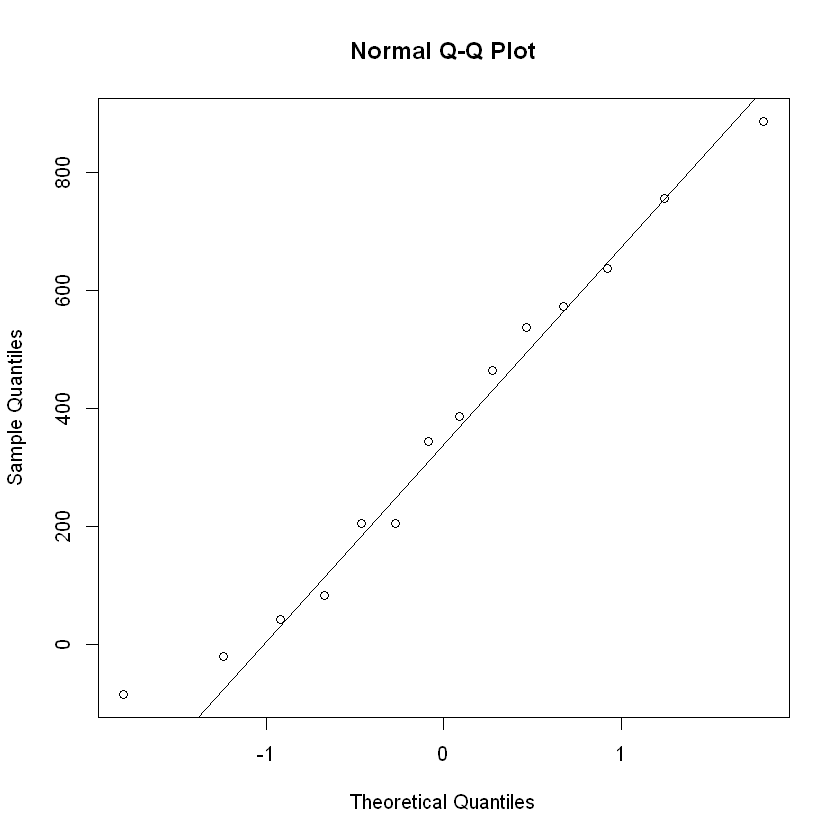

In [51]:
# Log model-3 # exponentioal model
plot( Weight,log(Calories)) 
cor(Weight,log(Calories))# cor relation little bit improved 
lm_log_Calories <- lm(Weight ~ log(Calories)) # log transformation
summary(lm_log_Calories) # after transformatin r square improved but not significant

qqnorm(resid(lm_log_Calories)) # checking residual value its not a linear
qqline(resid(lm_log_Calories)) # checking residual value its not a linear
qqnorm(fitted.values(lm_log_Calories)) # still it is not fitted values
qqline(fitted.values(lm_log_Calories)) # still it is not fitted values

rmse_log_Calories <- sqrt(mean(lm_log_Calories$residuals^2))
rmse_log_Calories # rmse not imporved , residual errors is large
summary(rmse_log_Calories) # rmse need to imporved 

[1] 0.920052


Call:
lm(formula = log(Weight) ~ log(Calories))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93630 -0.13114 -0.00868  0.23300  0.59723 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -14.9275     2.5121  -5.942 6.80e-05 ***
log(Calories)   2.6479     0.3255   8.135 3.17e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3711 on 12 degrees of freedom
Multiple R-squared:  0.8465,	Adjusted R-squared:  0.8337 
F-statistic: 66.17 on 1 and 12 DF,  p-value: 3.168e-06


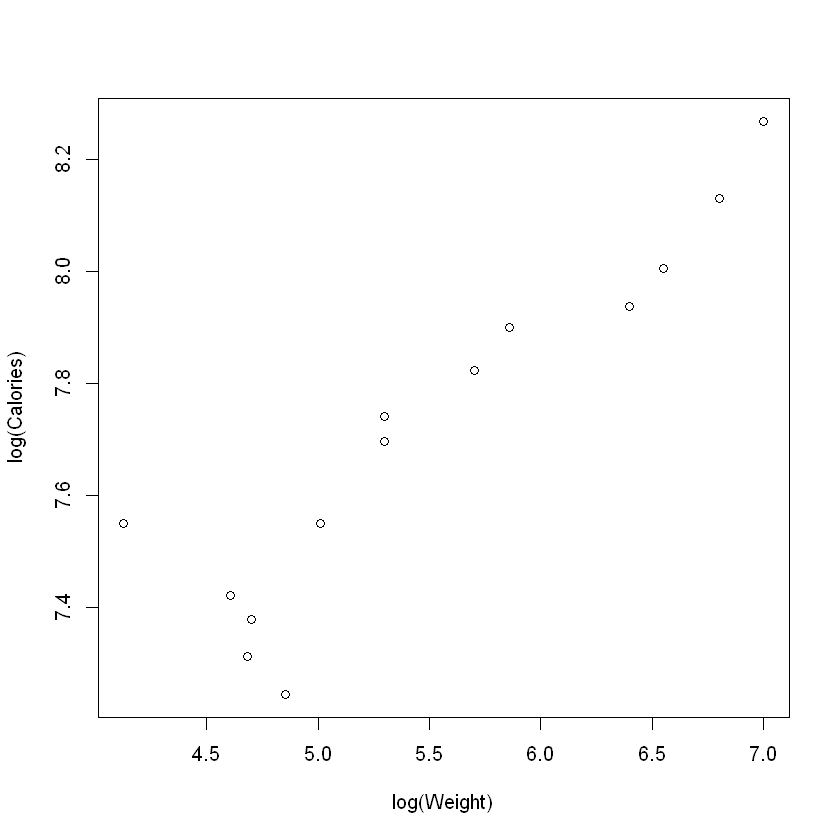

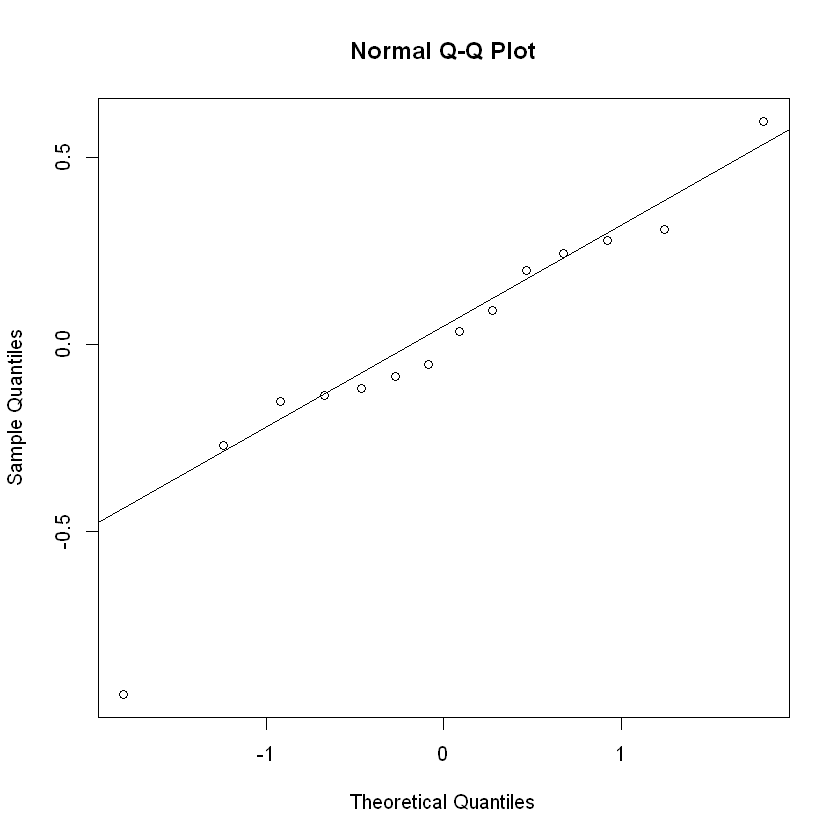

[1] 0.3436048

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3436  0.3436  0.3436  0.3436  0.3436  0.3436 

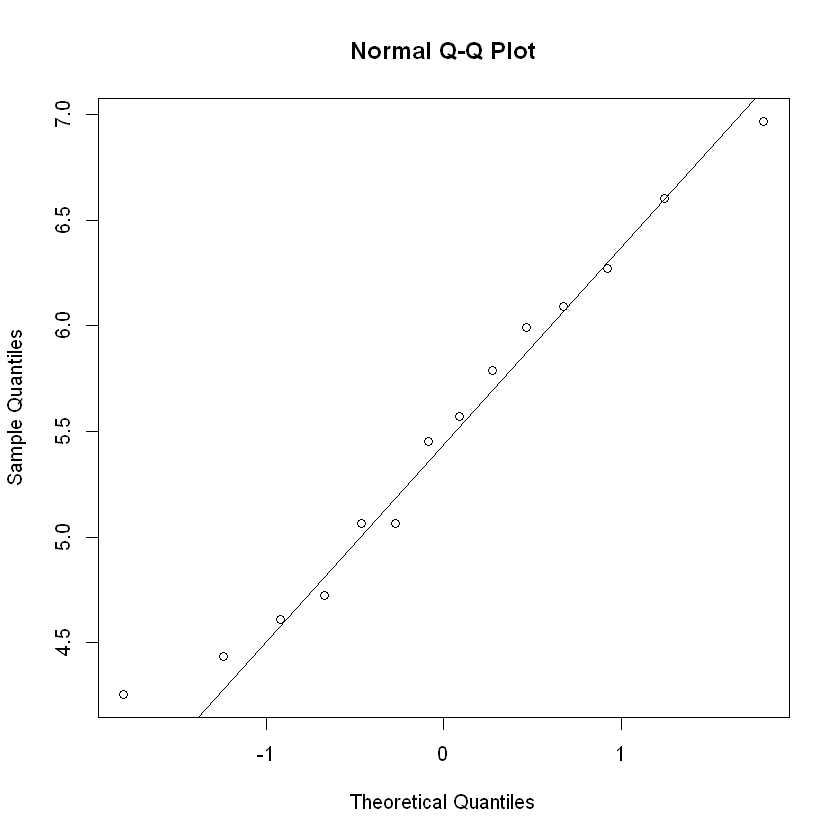

In [34]:
# Log model-3 # exponentioal model
plot( log(Weight),log(Calories)) 
cor(log(Weight),log(Calories))# cor relation little bit improved 
lm_log_model <- lm(log(Weight) ~ log(Calories)) # log transformation
summary(lm_log_model) # after transformatin r square improved but not significant
#confint(lm_log_model,level =0.95)

qqnorm(resid(lm_log_model)) # checking residual value its not a linear
qqline(resid(lm_log_model)) # checking residual value its not a linear
qqnorm(fitted.values(lm_log_model)) # still it is not fitted values
qqline(fitted.values(lm_log_model)) # still it is not fitted values

rmse_log_model <- sqrt(mean(lm_log_model$residuals^2))
rmse_log_model # rmse not imporved , residual errors is large
summary(rmse_log_model) # rmse need to imporved 

In [35]:
# Polynomial transformation 4 
lm_3 <- lm(log(Weight) ~ Calories + I(Calories * Calories))
summary(lm_3)

confint(lm_3,level=0.95)# confidence interval

log_res <- predict(lm_3,interval="confidence") #predicted confidence
atpoly <- exp(log_res) # expontial values at play 
atpoly
err_poly <- Weight - atpoly  # error deducted from y
err_poly

rmse3 <- sqrt(mean(err_poly^2)) # rmse
rmse3




Call:
lm(formula = log(Weight) ~ Calories + I(Calories * Calories))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86562 -0.10529  0.02403  0.13541  0.42759 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)             2.829e+00  1.062e+00   2.664    0.022 *
Calories                1.142e-03  8.807e-04   1.297    0.221  
I(Calories * Calories) -1.675e-09  1.707e-07  -0.010    0.992  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3461 on 11 degrees of freedom
Multiple R-squared:  0.8776,	Adjusted R-squared:  0.8553 
F-statistic: 39.44 on 2 and 11 DF,  p-value: 9.611e-06


,2.5 %,97.5 %
(Intercept),4.920101e-01,5.165429e+00
Calories,-7.962832e-04,3.080576e-03
I(Calories * Calories),-3.774780e-07,3.741279e-07


,fit,lwr,upr
1,93.51950,64.51052,135.5732
2,232.01333,175.53766,306.6589
3,806.45910,559.87321,1161.6492
4,207.12738,158.64199,270.4313
5,291.08521,216.04276,392.1937
6,104.78025,76.28691,143.9159
7,83.46614,53.84059,129.3930
8,147.34111,115.38786,188.1429
9,408.95151,300.67971,556.2109
10,1418.86480,723.70186,2781.7772


,fit,lwr,upr
1,14.480503,43.48948,-27.573175
2,-32.013330,24.46234,-106.658891
3,93.540901,340.12679,-261.649228
4,-7.127381,41.35801,-70.431255
5,8.914791,83.95724,-92.193654
6,5.219749,33.71309,-33.915921
7,44.533857,74.15941,-1.393028
8,-85.341113,-53.38786,-126.142875
9,191.048488,299.32029,43.789078
10,-318.864795,376.29814,-1681.777151


[1] 294.39